In [1]:
import sympy

sympy.init_printing()

### Variable Definitions

In [2]:
t, r, theta, phi, psi = sympy.symbols("t r theta phi psi")

In [3]:
dt, dr, dtheta, dphi, dpsi = sympy.symbols(r"dt dr d\theta d\phi d\psi")

In [4]:
a, b, m, q, g = sympy.symbols("a b m q g")

In [5]:
rplus = sympy.symbols("r_+")

In [6]:
delta_r, delta_theta, rho, xi_a, xi_b, f = sympy.symbols("Delta_r Delta_theta rho Xi_a Xi_b f")

In [7]:
nu, omega = sympy.symbols("nu omega")

### Metric

In [8]:
metric = -delta_theta * ((1 + g ** 2 * r ** 2) * rho ** 2 * dt + 2 * q * nu) * dt / (xi_a * xi_b * rho ** 2)
metric += 2 * q * nu * omega / rho ** 2
metric += f * ((delta_theta * dt) / (xi_a * xi_b) - omega) ** 2 / rho ** 4
metric += rho ** 2 * dr ** 2 / delta_r
metric += rho ** 2 * dtheta ** 2 / delta_theta
metric += (r ** 2 + a ** 2) * sympy.sin(theta) ** 2 * dphi ** 2 / xi_a
metric += (r ** 2 + b ** 2) * sympy.cos(theta) ** 2 * dpsi ** 2 / xi_b

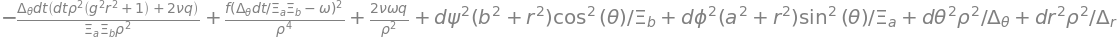

In [9]:
metric

In [10]:
nu_val = b * sympy.sin(theta) ** 2 * dphi + a * sympy.cos(theta) ** 2 * dpsi
nu_val

In [11]:
omega_val = a * sympy.sin(theta) ** 2 * dphi / xi_a + b * sympy.cos(theta) ** 2 * dpsi / xi_b
omega_val

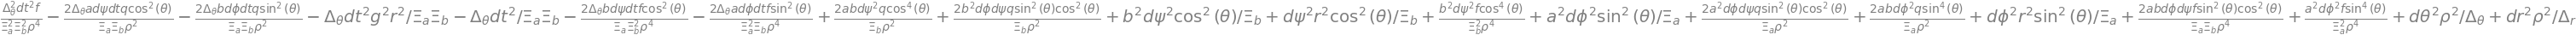

In [12]:
metric = metric.subs({nu: nu_val, omega: omega_val}).expand()
metric

Make the simplification $a = b$. In this case, $\Xi_a = \Xi_b = \Delta_\theta$.

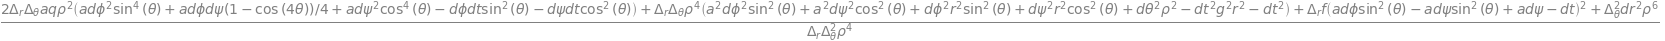

In [13]:
metric = metric.subs({b: a, xi_a: delta_theta, xi_b: delta_theta})
metric.simplify()

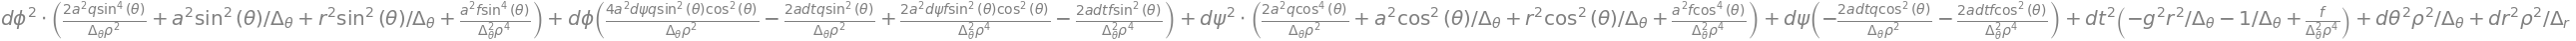

In [14]:
metric = metric.collect([dr, dphi, dpsi, dtheta, dt])
metric

With the simplification, the $\theta$ component is always positive definite and can be ignored.

Make the change of variables, $\tilde{\phi} = (\psi - \phi)/2$ and $\tilde{\psi} = (\phi + \psi)/2$, which means $\psi = \tilde{\phi} + \tilde{\psi}$ and $\phi = \tilde{\psi} - \tilde{\phi}$.

In [15]:
# keep the theta change of variable but don't use right now
phi_tilde, psi_tilde, theta_tilde = sympy.symbols("\\tilde{\phi} \\tilde{\psi} \\tilde{\\theta}")
dphi_tilde, dpsi_tilde, dtheta_tilde = sympy.symbols(r"d\tilde{\phi} d\tilde{\psi} d\tilde{\theta}")

In [16]:
dpsi_val = sympy.sin(theta) ** 2 * (dphi_tilde + dpsi_tilde)
dphi_val = sympy.cos(theta) ** 2 * (dpsi_tilde - dphi_tilde)

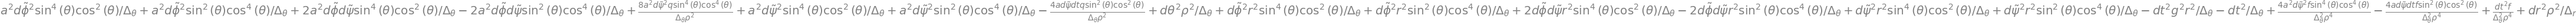

In [17]:
metric = metric.subs({dphi: dphi_val, dpsi: dpsi_val})
metric = metric.expand()
metric

In [18]:
metric_list_matrix = [[0 for i in range(4)] for i in range(4)]

# dt
metric_list_matrix[0][0] = metric.coeff(dt ** 2)
metric_list_matrix[0][1] = metric.coeff(dt * dr)
metric_list_matrix[0][2] = metric.coeff(dt * dphi_tilde)
metric_list_matrix[0][3] = metric.coeff(dt * dpsi_tilde)

# dr
metric_list_matrix[1][0] = metric.coeff(dr * dt)
metric_list_matrix[1][1] = metric.coeff(dr ** 2)
metric_list_matrix[1][2] = metric.coeff(dr * dphi_tilde)
metric_list_matrix[1][3] = metric.coeff(dr * dpsi_tilde)

# dphi_tilde
metric_list_matrix[2][0] = metric.coeff(dphi_tilde * dt)
metric_list_matrix[2][1] = metric.coeff(dphi_tilde * dr)
metric_list_matrix[2][2] = metric.coeff(dphi_tilde ** 2)
metric_list_matrix[2][3] = metric.coeff(dphi_tilde * dpsi_tilde)

# dpsi_tilde
metric_list_matrix[3][0] = metric.coeff(dpsi_tilde * dt)
metric_list_matrix[3][1] = metric.coeff(dpsi_tilde * dr)
metric_list_matrix[3][2] = metric.coeff(dpsi_tilde * dphi_tilde)
metric_list_matrix[3][3] = metric.coeff(dpsi_tilde ** 2)

In [19]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat

⎡           2  2                                                              
⎢          g ⋅r       1          f                                            
⎢        - ────── - ────── + ──────────           0                           
⎢          Δₜₕₑₜₐ   Δₜₕₑₜₐ         2  4                                       
⎢                            Δₜₕₑₜₐ ⋅ρ                                        
⎢                                                                             
⎢                                                  2                          
⎢                                                 ρ                           
⎢                       0                         ──                          
⎢                                                 Δᵣ                          
⎢                                                                             
⎢                                                          2    4       2     
⎢                                                   

In [20]:
g_mat.simplify()
g_mat

⎡      2  2                                                                   
⎢     g ⋅r       1          f                                                 
⎢   - ────── - ────── + ──────────     0                   0                  
⎢     Δₜₕₑₜₐ   Δₜₕₑₜₐ         2  4                                            
⎢                       Δₜₕₑₜₐ ⋅ρ                                             
⎢                                                                             
⎢                                       2                                     
⎢                                      ρ                                      
⎢                 0                    ──                  0                  
⎢                                      Δᵣ                                     
⎢                                                                             
⎢                                                             ⎛ 2    2⎞       
⎢                                              (1 - 

Introduce other functions of q.

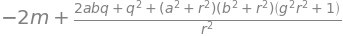

In [21]:
delta_r_val = ((r ** 2 + a ** 2) * (r ** 2 + b ** 2) * (1 + g ** 2 * r ** 2) + q ** 2 + 2 * a * b * q) / r ** 2 - 2 * m
delta_r_val

In [22]:
f_val = 2 * m * rho ** 2 - q ** 2 + 2 * a * b * q * g ** 2 * rho ** 2
f_val

In [23]:
g_mat_2 = g_mat.subs({delta_r: delta_r_val, f: f_val})
g_mat_2

⎡          2  2                    2    2        2    2                       
⎢         g ⋅r       1      2⋅a⋅b⋅g ⋅q⋅ρ  + 2⋅m⋅ρ  - q                        
⎢       - ────── - ────── + ───────────────────────────                       
⎢         Δₜₕₑₜₐ   Δₜₕₑₜₐ                  2  4                               
⎢                                    Δₜₕₑₜₐ ⋅ρ                                
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                              0                                 ─────────────
⎢                                                                             
⎢                                                                       2⋅a⋅b⋅
⎢                                                                -2⋅m + ──────
⎢                                                   